# Data Wrangling on Real Estate Market


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1 Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity.

df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# 2.Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,imputation or removal).

df1.rename(columns={
    "area_type": "area_type",
    "availability": "availability",
    "location": "location",
    "size": "size",
    "society": "society",
    "total_sqft": "total_sqft",
    "bath": "bathrooms",
    "balcony": "balconies",
    "price": "price_lakhs"
}, inplace=True)

print(df1.columns)


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bathrooms', 'balconies', 'price_lakhs'],
      dtype='object')


In [4]:
df1.shape

(13320, 9)

In [5]:
# 2 Handle missing values in the dataset, deciding on an appropriate strategy (e.g.,imputation or removal).
df2 = df1.drop(['area_type','society','balconies','availability'], axis='columns')

In [6]:
df2.head()

,location,size,total_sqft,bathrooms,price_lakhs
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.tail()

,location,size,total_sqft,bathrooms,price_lakhs
13315,Whitefield,5 Bedroom,3453,4.0,231.0
13316,Richards Town,4 BHK,3600,5.0,400.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.0
13319,Doddathoguru,1 BHK,550,1.0,17.0


In [8]:
df2.shape

(13320, 5)

In [9]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bathrooms      73
price_lakhs     0
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     13319 non-null  object 
 1   size         13304 non-null  object 
 2   total_sqft   13320 non-null  object 
 3   bathrooms    13247 non-null  float64
 4   price_lakhs  13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
df2.isnull().mean()*100

location       0.007508
size           0.120120
total_sqft     0.000000
bathrooms      0.548048
price_lakhs    0.000000
dtype: float64

In [12]:
df2['location'].fillna(df2['location'].mode()[0],inplace=True)
df2['size'].fillna(df2['size'].mode()[0],inplace=True)
df2['bathrooms'].fillna("Unknown", inplace=True)

df2.isnull().sum()

location       0
size           0
total_sqft     0
bathrooms      0
price_lakhs    0
dtype: int64

In [13]:
# 3 Perform data merging if additional datasets with relevant information are available (e.g., neighborhood demographics or nearby amenities).

df2.shape

(13320, 5)

In [14]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2[['size','bhk']] 

,size,bhk
0,2 BHK,2
1,4 Bedroom,4
2,3 BHK,3
3,3 BHK,3
4,2 BHK,2
...,...,...
13315,5 Bedroom,5
13316,4 BHK,4
13317,2 BHK,2
13318,4 BHK,4


In [17]:
df2['total_sqft'].head(10)

0    1056
1    2600
2    1440
3    1521
4    1200
5    1170
6    2732
7    3300
8    1310
9    1020
Name: total_sqft, dtype: object

In [18]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
df2.head()

,location,size,total_sqft,bathrooms,price_lakhs,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
def convert_sqft_to_num(x): 
    tokens = x.split('-')
    if len(tokens) == 2:
        try:
            return (float(tokens[0])+float(tokens[1]))/2
        except ValueError:
            return None
    try:
        return float(x) 
    except ValueError:
        return None

result = convert_sqft_to_num('2100 - 2850')
print(result)

2475.0


In [20]:
convert_sqft_to_num('34.46Sq. Meter') 
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num) 
df3

,location,size,total_sqft,bathrooms,price_lakhs,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [21]:
# 4 Filter and subset the data based on specific criteria, such as a particular time period, property type, or location.

# 1. Filter by property type (only 2 BHK)
bhk2_data = df2[df2['size'] == '2 BHK']
bhk2_data

,location,size,total_sqft,bathrooms,price_lakhs,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
12,7th Phase JP Nagar,2 BHK,1000,2.0,38.00,2
13,Gottigere,2 BHK,1100,2.0,40.00,2
...,...,...,...,...,...,...
13302,Annaiah Reddy Layout,2 BHK,1075,2.0,48.00,2
13304,Raja Rajeshwari Nagar,2 BHK,1187,2.0,40.14,2
13310,Rachenahalli,2 BHK,1050,2.0,52.71,2
13312,Bellandur,2 BHK,1262,2.0,47.00,2


In [22]:
# 2. Filter by location

whitefield_data = df1[df1['location'] == 'Whitefield']
whitefield_data

,area_type,availability,location,size,society,total_sqft,bathrooms,balconies,price_lakhs
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
27,Built-up Area,20-Dec,Whitefield,3 BHK,NaN,1610,3.0,2.0,81.00
47,Super built-up Area,20-Sep,Whitefield,2 BHK,Goted U,1459,2.0,1.0,94.82
...,...,...,...,...,...,...,...,...,...
13235,Super built-up Area,Ready To Move,Whitefield,3 BHK,SJces R,1730,3.0,2.0,125.00
13257,Super built-up Area,Ready To Move,Whitefield,3 BHK,SLiritn,1453,2.0,2.0,58.00
13258,Super built-up Area,19-Dec,Whitefield,1 BHK,Oreldhi,877,1.0,1.0,59.00
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.50


In [33]:
# 3. Filter by price (greater than 50 lakhs)

expensive_houses = df2[df2['price_lakhs'] > 50].sort_values(by='price_lakhs', ascending=False)
expensive_houses


,location,size,total_sqft,bathrooms,price_lakhs,bhk
13067,Defence Colony,10 Bedroom,7150,13.0,3600.000,10
11080,Ashok Nagar,4 BHK,8321,5.0,2912.000,4
13200,Defence Colony,6 Bedroom,8000,6.0,2800.000,6
11763,Sadashiva Nagar,5 Bedroom,9600,7.0,2736.000,5
3180,Shanthala Nagar,5 BHK,8321,5.0,2700.000,5
...,...,...,...,...,...,...
10563,Rachenahalli,2 BHK,985,2.0,50.170,2
7286,Kanakpura Road,2 BHK,1010 - 1300,2.0,50.125,2
12276,manyata,2 BHK,1169,2.0,50.110,2
5145,Begur Road,3 BHK,1400,2.0,50.060,3


In [34]:
df3

,location,size,total_sqft,bathrooms,price_lakhs,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [35]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe
df_encoded = df2.copy()
df_encoded.head()

,location,size,total_sqft,bathrooms,price_lakhs,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [36]:
df_encoded['bhk'] = df2['size'].str.extract(r'(\d+)').astype(float)
df_encoded[['bhk','size']].head()

,bhk,size
0,2.0,2 BHK
1,4.0,4 Bedroom
2,3.0,3 BHK
3,3.0,3 BHK
4,2.0,2 BHK


In [37]:
df_encoded.columns

Index(['location', 'size', 'total_sqft', 'bathrooms', 'price_lakhs', 'bhk'], dtype='object')

In [38]:
# 6 Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.

avg_price_location = df3.groupby('location')['price_lakhs'].mean()
print(avg_price_location.head())


location
Anekal                  16.000000
Banaswadi               35.000000
Basavangudi             50.000000
Bhoganhalli             22.890000
Devarabeesana Halli    124.833333
Name: price_lakhs, dtype: float64


In [39]:
avg_price_bhk = df2.groupby('size')['price_lakhs'].mean()
avg_price_bhk.head()


size
1 BHK          39.525204
1 Bedroom      72.851143
1 RK           28.122308
10 BHK        342.500000
10 Bedroom    561.250000
Name: price_lakhs, dtype: float64

In [40]:
summary_stats = df2.groupby('location')['price_lakhs'].agg(['mean', 'median', 'min', 'max', 'count'])
summary_stats.head()


,mean,median,min,max,count
location,,,,,
Anekal,16.000000,16.00,16.00,16.00,1
Banaswadi,35.000000,35.00,35.00,35.00,1
Basavangudi,50.000000,50.00,50.00,50.00,1
Bhoganhalli,22.890000,22.89,22.89,22.89,1
Devarabeesana Halli,124.833333,149.50,70.00,160.00,6


In [41]:
df2.columns

Index(['location', 'size', 'total_sqft', 'bathrooms', 'price_lakhs', 'bhk'], dtype='object')

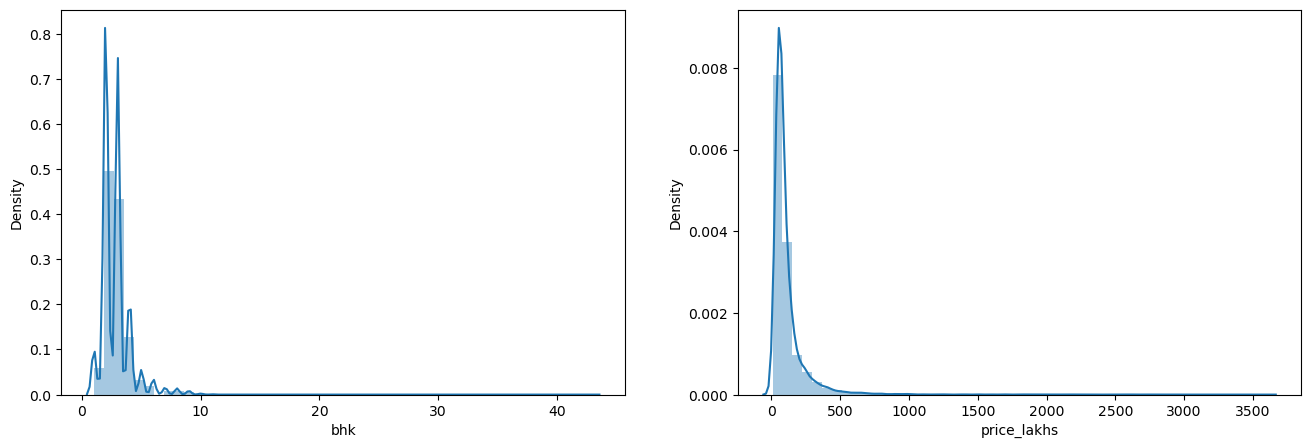

In [42]:
# 7 Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['bhk']) 

plt.subplot(1,2,2)
sns.distplot(df2['price_lakhs'])
plt.show()

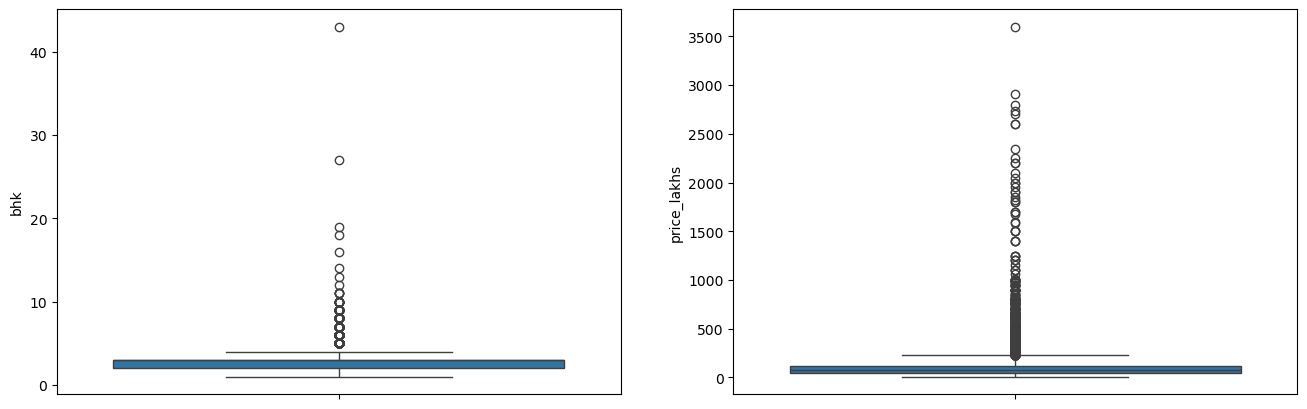

In [43]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.boxplot(df2['bhk'])

plt.subplot(1,2,2)
sns.boxplot(df2['price_lakhs'])
plt.show()

In [44]:
# Finding the IQR

percent25 = df2['bhk'].quantile(0.25)
percent75 = df2['bhk'].quantile(0.75)
percent25

2.0

In [45]:
percent75


3.0

In [46]:
iqr = percent75 - percent25
iqr

1.0

In [47]:
upper_limit = percent75 + 1.5 * iqr
lower_limit = percent25 - 1.5 * iqr


In [48]:
print('upper limits',upper_limit)
print('lower limits',lower_limit)

upper limits 4.5
lower limits 0.5


In [49]:
df2['bhk'] = np.where(
    df2['bhk'] > upper_limit, upper_limit,
    np.where(df2['bhk'] < lower_limit, lower_limit, df2['bhk'])
)


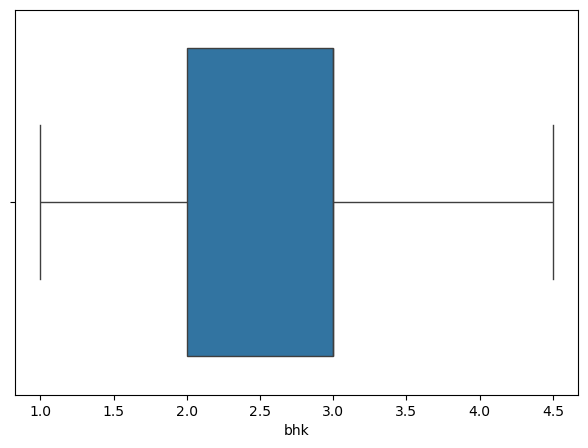

In [50]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(x=df2['bhk'])


plt.show()
